In [81]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebrare
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import seaborn as snsboost
import matplotlib.pyplot as plt

In [82]:
#read the data
data = pd.read_csv("C:/Users/Santosh/Desktop/data-science-training-04-05-2019/Linear Regression City Taxi Assignment/taxi_fare.csv", nrows = 100000)

**PART 1 --> DATA CLEANSING & EXPLORATORY DATA ANALYSIS (EDA)**

Will perform the following activities
* Shape of train and test sets
* Check for NaNs and drop them (if any)
* Check for outliers and drop them (if any)
* Type conversion of relevant fields

In [83]:
train = data

In [84]:
train.shape

(100000, 8)

In [85]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2


In [86]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,11.354652,-72.494682,39.914481,-72.490967,39.919053,1.673820
std,9.716777,10.693934,6.225686,10.471386,6.213427,1.300171
min,-44.900000,-736.550000,-74.007670,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992041,40.734996,-73.991215,40.734182,1.000000
50%,8.500000,-73.981789,40.752765,-73.980000,40.753243,1.000000
75%,12.500000,-73.966982,40.767258,-73.963433,40.768166,2.000000
max,200.000000,40.787575,401.083332,40.851027,404.616667,6.000000


In [87]:
#check for missing values in train data
train.isnull().sum().sort_values(ascending=False)

passenger_count      0
dropoff_latitude     0
dropoff_longitude    0
pickup_latitude      0
pickup_longitude     0
pickup_datetime      0
fare_amount          0
key                  0
dtype: int64

In [88]:
#drop the missing values
train = train.dropna(axis=0,how='any')

In [89]:
train.shape

(100000, 8)

In [90]:
#check the target column
train['fare_amount'].describe()

count    100000.000000
mean         11.354652
std           9.716777
min         -44.900000
25%           6.000000
50%           8.500000
75%          12.500000
max         200.000000
Name: fare_amount, dtype: float64

Fare amount has a negative value, which doesn't make sense. Remove these fields

In [91]:
#38 fields have negative fare_amount values.
from collections import Counter
Counter(train['fare_amount']<0)

Counter({False: 99991, True: 9})

In [92]:
train = train.drop(train[train['fare_amount']<0].index, axis=0)
train.shape

(99991, 8)

In [93]:
#no more negative values in the fare field
train['fare_amount'].describe()

count    99991.000000
mean        11.356387
std          9.714697
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: fare_amount, dtype: float64

In [94]:
#highest fare is $200
train['fare_amount'].sort_values(ascending=False)

28373    200.00
1335     180.00
1483     165.00
43956    165.00
61163    160.77
62648    160.00
46198    160.00
78623    150.00
91906    150.00
26027    149.00
56316    149.00
96701    145.83
93495    145.58
42756    143.00
88207    140.00
96486    136.50
61842    136.33
33502    136.00
25201    135.00
67453    132.00
75998    130.00
52957    130.00
69140    130.00
6630     128.83
37215    128.61
61494    128.00
83014    127.00
51846    120.00
55475    120.00
20886    120.00
          ...  
91217      2.50
68069      2.50
14633      2.50
44898      2.50
35617      2.50
44932      2.50
44941      2.50
66772      2.50
77621      2.50
13571      2.50
51083      2.50
63211      2.50
26109      2.50
80924      2.50
18943      2.50
26096      2.50
97813      2.50
14574      2.50
44303      2.50
41049      2.50
67991      2.50
74939      2.50
85508      2.50
18981      2.50
30757      2.50
90010      0.01
2780       0.01
27891      0.00
10002      0.00
47302      0.00
Name: fare_amount, Lengt

Next check the passenger_count variable

In [95]:
train['passenger_count'].describe()

count    99991.000000
mean         1.673761
std          1.300083
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [96]:
#max is 208 passengers. Assuming that a bus is a 'taxi' in NYC, I don't think a bus can carry 208 passengers! Let' see the distribution of this field
#One field. this is DEFINITELY an outlier. Lets drop it 
#Since I have taken only 100000 record you will not see any outlier in this case, but in the whole data we have an outlier with
#208 passenger
train[train['passenger_count']>6]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [97]:
train = train.drop(train[train['passenger_count']==208].index, axis = 0)

In [98]:
#much neater now! Max number of passengers are 6. Which makes sense is the cab is an SUV :)
train['passenger_count'].describe()

count    99991.000000
mean         1.673761
std          1.300083
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [99]:
#Next, let us explore the pickup latitude and longitudes
train['pickup_latitude'].describe()

count    99991.000000
mean        39.914408
std          6.225961
min        -74.007670
25%         40.734997
50%         40.752765
75%         40.767258
max        401.083332
Name: pickup_latitude, dtype: float64

## Lattitude and Longitude
* Latitudes range from -90 to 90.
* Longitudes range from -180 to 180.

The above describe clearly shows some outliers. Let's filter them

In [100]:
train[train['pickup_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [101]:
train[train['pickup_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
5686,2011-07-30 11:15:00.00000082,3.3,2011-07-30 11:15:00 UTC,-73.947235,401.083332,-73.951392,40.778927,1


In [102]:
#We need to drop these outliers
train = train.drop(((train[train['pickup_latitude']<-90])|(train[train['pickup_latitude']>90])).index, axis=0)

In [103]:
#12 rows dropped
train.shape

(99990, 8)

In [104]:
#similar operation for pickup longitude
train['pickup_longitude'].describe()

count    99990.000000
mean       -72.494539
std         10.694459
min       -736.550000
25%        -73.992041
50%        -73.981789
75%        -73.966986
max         40.787575
Name: pickup_longitude, dtype: float64

In [105]:
train[train['pickup_longitude']<-180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
60442,2012-01-12 13:36:00.000000186,4.9,2012-01-12 13:36:00 UTC,-736.55,40.73823,-73.988742,40.748847,1


In [106]:
train[train['pickup_longitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [107]:
train = train.drop(((train[train['pickup_longitude']<-180])|(train[train['pickup_longitude']>180])).index, axis=0)

In [108]:
#11 rows dropped
train.shape

(99989, 8)

In [109]:
#similar operation for dropoff latitude and longitude
train[train['dropoff_latitude']<-90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


In [110]:
train[train['dropoff_latitude']>90]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
92310,2011-09-27 11:54:00.000000127,28.9,2011-09-27 11:54:00 UTC,-74.014595,40.68188,-73.97331,404.616667,1


In [111]:
train = train.drop(((train[train['dropoff_latitude']<-90])|(train[train['dropoff_latitude']>90])).index, axis=0)

In [112]:
#8 rows dropped
train.shape

(99988, 8)

In [113]:
train[train['dropoff_latitude']<-180]|train[train['dropoff_latitude']>180]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count


Check the data types of each column

In [114]:
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [115]:
#check the dtypes after conversion
train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Now, for **EDA**. The following are my considerations - 
1. Does the number of passengers affect the fare? 
2. Does the date and time of pickup affect the fare?
3. Does the day of the week affect the fare?
4. Does the distance travelled affect the fare?

First, let's split the datetime field 'pickup_datetime' to the following - 
* year
* month
* date
* hour
* day of week

Using these we shall calculate the day of the week and come to our conclusions about how pickup_location affects the fare.
Also, create a new field 'distance' to fetch the distance between the pickup and the drop.

We can calulate the distance in a sphere when latitudes and longitudes are given by [Haversine formula](https://en.wikipedia.org/wiki/Haversine_formula)

**haversine(θ) = sin²(θ/2)**

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

**a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)**

**c = 2 * atan2( √a, √(1−a) )**

**d = R ⋅ c**

**d = Haversine distance**

*Refer [this](https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula) page for more info and examples on Haversine formula*

In [116]:
def haversine_distance(lat1, long1, lat2, long2):
    data = train
    i=data
    R = 6371  #radius of earth in kilometers
    #R = 3959 #radius of earth in miles
    phi1 = np.radians(i[lat1])
    phi2 = np.radians(i[lat2])
    
    delta_phi = np.radians(i[lat2]-i[lat1])
    delta_lambda = np.radians(i[long2]-i[long1])

    #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
    a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
    #c = 2 * atan2( √a, √(1−a) )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
    #d = R*c
    d = (R * c) #in kilometers
    i['H_Distance'] = d
    return d

In [117]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        1.030764
1        8.450134
2        1.389525
3        2.799270
4        1.999157
5        3.787239
6        1.555807
7        4.155444
8        1.253232
9        2.849627
10       1.374577
11       0.000000
12       0.717767
13       2.019384
14       1.671445
15       0.000000
16       2.609774
17       1.511904
18       0.921952
19       0.399179
20       1.686861
21       2.292470
22       0.924296
23       1.403958
24       1.017773
25       2.531947
26       0.000000
27       0.328771
28       4.073463
29       0.808153
           ...   
99970    2.085900
99971    0.000000
99972    0.973607
99973    0.899086
99974    1.404813
99975    2.451586
99976    1.379094
99977    2.243915
99978    1.411411
99979    0.027717
99980    5.794172
99981    6.083561
99982    0.755056
99983    1.943737
99984    3.801868
99985    1.106545
99986    0.000111
99987    1.661596
99988    4.044745
99989    1.165130
99990    6.191375
99991    1.237829
99992    1.445673
99993    5.621187
99994    1

In [118]:
train['H_Distance'].head(10)

0    1.030764
1    8.450134
2    1.389525
3    2.799270
4    1.999157
5    3.787239
6    1.555807
7    4.155444
8    1.253232
9    2.849627
Name: H_Distance, dtype: float64

In [119]:
train.head(10)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,1.030764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,8.450134
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,1.389525
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2.799270
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.999157
5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1,3.787239
6,2012-11-20 20:35:00.0000001,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1,1.555807
7,2012-01-04 17:22:00.00000081,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1,4.155444
8,2012-12-03 13:10:00.000000125,9.0,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1,1.253232
9,2009-09-02 01:11:00.00000083,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2,2.849627


Now that we have calculated the distance, we shall create columns for the following - 
* year
* month
* date
* hour
* day of week

In [120]:
# convert pickup_datetime to pandas time object
train['pickup_datetime'] = pd.to_datetime(train['pickup_datetime'])

In [121]:
train['Year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day of Week'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour

In [122]:
train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,1.030764,2009,6,15,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,8.450134,2010,1,5,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,1.389525,2011,8,18,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2.799270,2012,4,21,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,1.999157,2010,3,9,1,7


**1. Does the number of passengers affect the fare? **

Text(0, 0.5, 'Frequency')

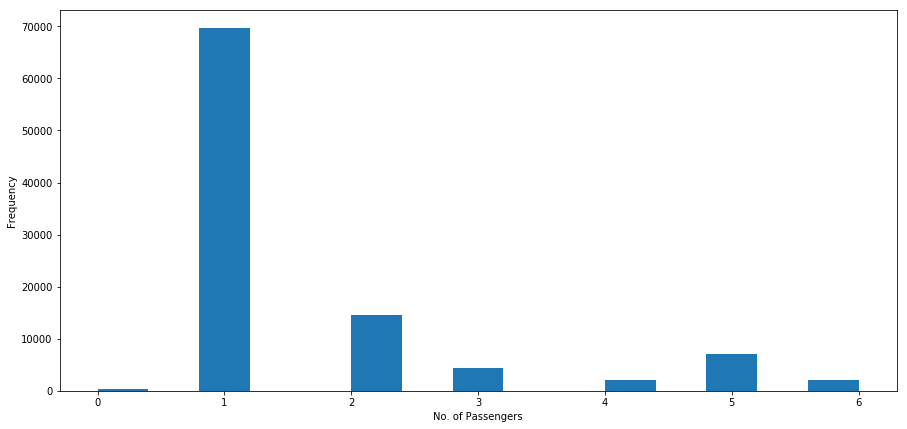

In [45]:
plt.figure(figsize=(15,7))
plt.hist(train['passenger_count'], bins=15)
plt.xlabel('No. of Passengers')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

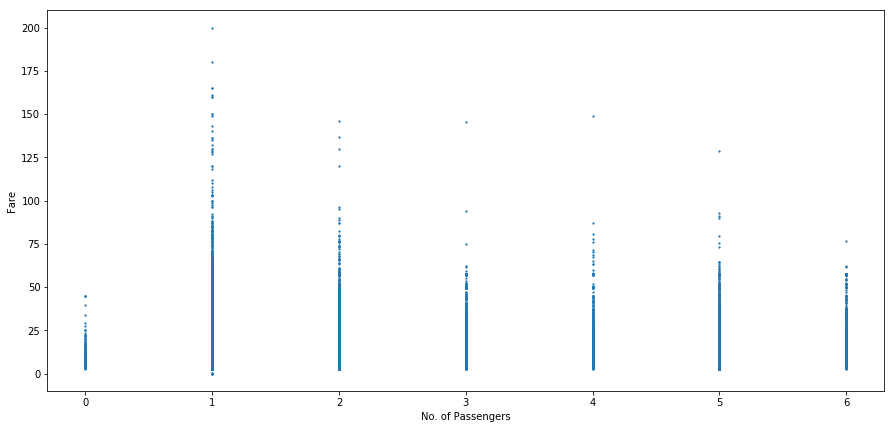

In [156]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=1.5)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')

From the above 2 graphs we can see that single passengers are the most frequent travellers, and the highest fare also seems to come from cabs which carry just 1 passenger.

**2. Does the date and time of pickup affect the fare?**

Text(0, 0.5, 'Fare')

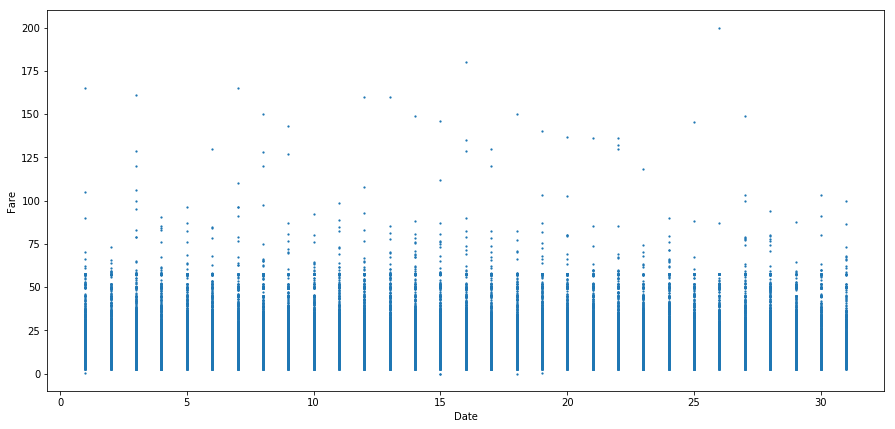

In [101]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Date'], y=train['fare_amount'], s=1.5)
plt.xlabel('Date')
plt.ylabel('Fare')

The fares throught the month mostly seem uniform, with the maximum fare received on the 12th

Text(0, 0.5, 'Frequency')

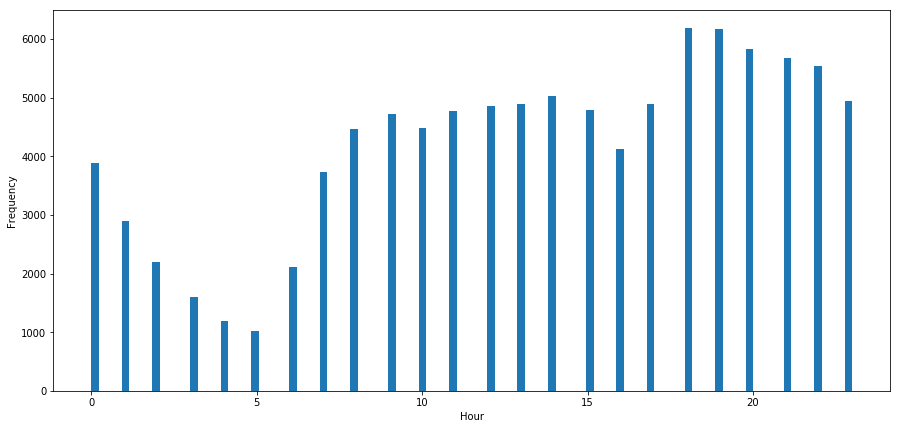

In [102]:
plt.figure(figsize=(15,7))
plt.hist(train['Hour'], bins=100)
plt.xlabel('Hour')
plt.ylabel('Frequency')

Interesting! The time of day definitely plays an important role. The frequency of cab rides seem to be the lowest at 5AM and the highest at 7PM.

Text(0, 0.5, 'Fare')

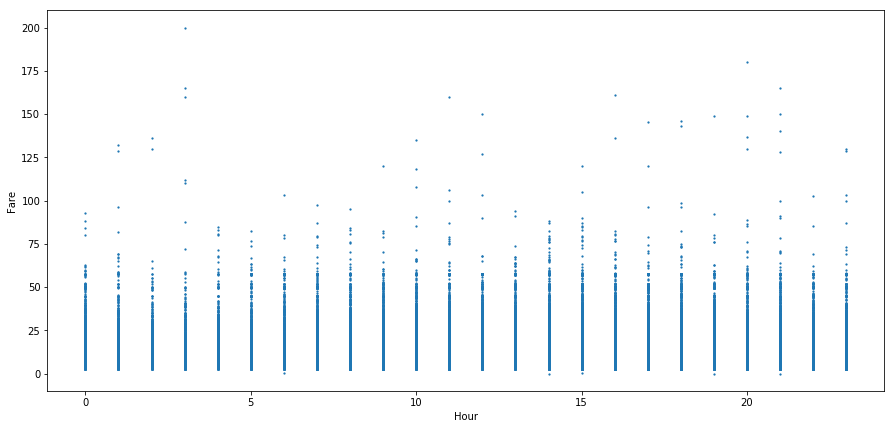

In [103]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Hour'], y=train['fare_amount'], s=1.5)
plt.xlabel('Hour')
plt.ylabel('Fare')

The fares, however, seem to be high betweeb 5AM and 10AM, and 2PM to 4PM. Maybe people who live far away prefer to leave earlier to avoid rush hour traffic? you will get this when you wi ll import around 5-10 lakhs data, since I have taken only 100000 I am seeing a different stats

**3. Does the day of the week affect the fare?**

Text(0, 0.5, 'Frequency')

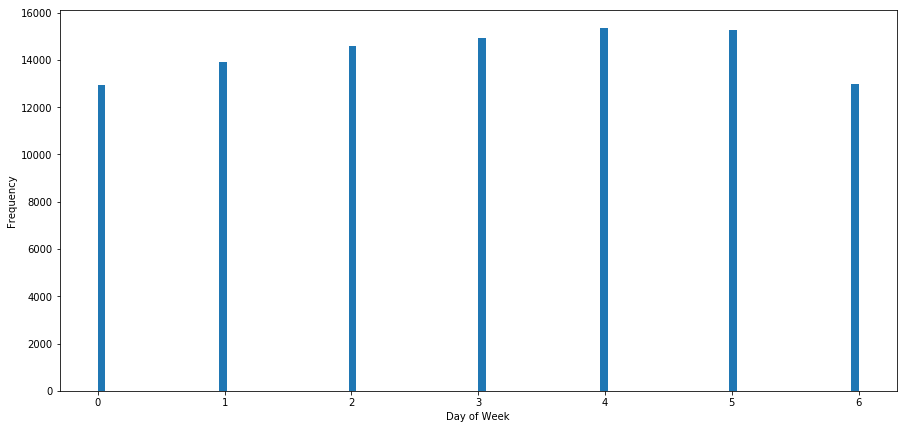

In [104]:
plt.figure(figsize=(15,7))
plt.hist(train['Day of Week'], bins=100)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')

Text(0, 0.5, 'Fare')

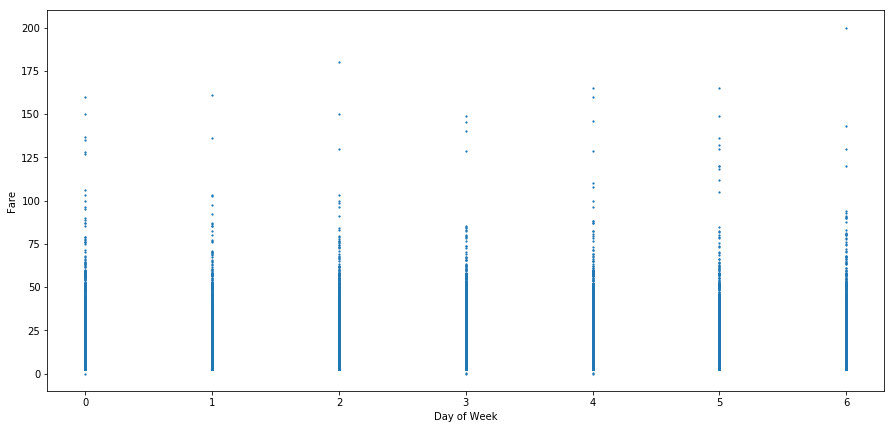

In [105]:
plt.figure(figsize=(15,7))
plt.scatter(x=train['Day of Week'], y=train['fare_amount'], s=1.5)
plt.xlabel('Day of Week')
plt.ylabel('Fare')

The highest fares seem to be on a Sunday and Monday, and the lowest on Wednesday and Friday. Maybe people travel far distances on Sunday and Monday (visiting family and returning back home), and hence, the high fares. And guess people just want to stay at home on a Friday after a hectic week at work, or grab a drink from close by. Hmmm..

**4. Does the distance affect the fare?**

This is a no-brainer. I am confident that the distance would affect the fare a great deal. But I will visualise it.

Firstly, let's check the frequency of the distances that we calculated using Haversine formula. I will do so by creating bins (0-10 kms, 10-20 kms, and so on, and check for any outliers)

In [157]:
train.sort_values(['H_Distance','fare_amount'], ascending=False)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour
67343,2014-08-14 06:58:00.00000070,10.0,2014-08-14 06:58:00,-74.095877,40.718052,0.000000,0.000000,2,8674.621830,2014,8,14,3,6
54350,2012-07-03 19:55:00.000000211,45.0,2012-07-03 19:55:00,0.000000,0.000000,-74.039030,40.729718,1,8670.149806,2012,7,3,1,19
48996,2012-05-12 10:48:00.00000020,49.8,2012-05-12 10:48:00,-74.014917,40.713382,0.000000,0.000000,1,8667.818812,2012,5,12,5,10
51743,2015-01-10 18:41:30.0000001,7.5,2015-01-10 18:41:30,0.000000,0.000000,-74.008026,40.739788,1,8667.787593,2015,1,10,5,18
85267,2015-02-09 22:06:54.0000003,37.5,2015-02-09 22:06:54,0.000000,0.000000,-74.014015,40.709560,1,8667.666045,2015,2,9,0,22
31823,2013-11-26 18:12:00.000000179,52.0,2013-11-26 18:12:00,-74.005490,40.739532,0.000000,0.000000,1,8667.572331,2013,11,26,1,18
50678,2014-06-22 22:22:03.0000005,6.0,2014-06-22 22:22:03,0.000000,0.000000,-74.002537,40.750143,2,8667.544802,2014,6,22,6,22
9147,2014-07-14 21:37:29.0000002,8.5,2014-07-14 21:37:29,0.000000,0.000000,-74.002037,40.752035,1,8667.542104,2014,7,14,0,21
89002,2015-04-19 18:06:55.0000002,19.3,2015-04-19 18:06:55,0.000000,0.000000,-74.004478,40.741829,2,8667.535529,2015,4,19,6,18
37798,2013-08-28 12:11:00.00000087,22.5,2013-08-28 12:11:00,-74.004465,40.741823,0.000000,0.000000,1,8667.534293,2013,8,28,2,12


In [123]:
len(train)

99988

In [124]:
# convert distance to a range
train.loc[(train['H_Distance'] == 0), 'Range_Distance'] = '0'
train.loc[(train['H_Distance'] > 0) & (train['H_Distance'] <= 10),'Range_Distance'] = '0-10'
train.loc[(train['H_Distance'] > 10) & (train['H_Distance'] <= 50),'Range_Distance'] = '11-50' 
train.loc[(train['H_Distance'] > 50) & (train['H_Distance'] <= 100),'Range_Distance'] = '51-100'
train.loc[(train['H_Distance'] > 100) & (train['H_Distance'] <= 200),'Range_Distance'] = '100-200'
train.loc[(train['H_Distance'] > 200) & (train['H_Distance'] <= 300),'Range_Distance'] = '201-300'
train.loc[(train['H_Distance'] > 300),'Range_Distance'] = '>300'


In [125]:
train['Range_Distance'].value_counts()

0-10       91900
11-50       4945
0           2913
>300         187
100-200       24
51-100        18
201-300        1
Name: Range_Distance, dtype: int64

There are values which are greater than 100 kms! In NYC I am not sure why people would take cabs to travel more than a 100 kms. Since the number of bins for 100-200 kms is quite high, I will keep these. These outliers could be because of typos or missing values in the latitude or longitude. Remove fields of the following - 
1.  Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is 0
2. vice versa of point 1.
3. Pickup latitude and pickup longitude are 0 but dropoff latitude and longitude are not 0, but the fare is NOT 0. Here I will have to impute the distance values in both the train and test data.

In [126]:
#pickup latitude and longitude = 0
train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Range_Distance


In [127]:
train = train.drop(train.loc[((train['pickup_latitude']==0) & (train['pickup_longitude']==0))&((train['dropoff_latitude']!=0) & (train['dropoff_longitude']!=0)) & (train['fare_amount']==0)].index, axis=0)

In [128]:
train = train.drop(train.loc[((train['pickup_latitude']!=0) & (train['pickup_longitude']!=0))&((train['dropoff_latitude']==0) & (train['dropoff_longitude']==0)) & (train['fare_amount']==0)].index, axis=0)

In [129]:
#3 rows dropped
train.shape

(99988, 15)

Check the H_Distance fields which are greater than 200 kms cause there is no way that people would travel more than 200 kms at the most in NYC in a CAB!

In [130]:
high_distance = train.loc[(train['H_Distance']>200)&(train['fare_amount']!=0)]

In [131]:
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Range_Distance
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,8667.304968,2009,2,22,6,22,>300
1260,2011-03-10 20:25:00.00000049,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,8665.268588,2011,3,10,3,20,>300
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,6026.494216,2011,8,29,0,8,>300
2397,2012-06-24 17:11:10.0000001,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,8667.454421,2012,6,24,6,17,>300
4278,2015-04-07 23:33:02.0000005,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,8665.223767,2015,4,7,1,23,>300
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,8666.566030,2010,3,30,1,7,>300
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,5420.988959,2012,3,4,6,1,>300
6188,2014-07-28 15:04:00.00000028,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8664.191488,2014,7,28,0,15,>300
6302,2015-02-27 16:18:58.0000004,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8663.039123,2015,2,27,4,16,>300
7014,2011-06-18 04:03:00.00000083,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,4447.086698,2011,6,18,5,4,>300


188 rows! As you can see from the DF above, the abnormally high distances are due to either the pickup or dropoff co-ordinates being incorrect or 0. However, since all these values have fares, I do not wish to drop them as they contain crucial data. Instead, I will replace the initial distance values with distance values calculated using the fare using the following formula 

> *distance = (fare_amount - 2.5)/1.56*

In [132]:
high_distance.shape

(188, 15)

In [133]:
high_distance['H_Distance'] = high_distance.apply(
    lambda row: (row['fare_amount'] - 2.50)/1.56,
    axis=1
)

C:\Users\Santosh\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [134]:
#The distance values have been replaced by the newly calculated ones according to the fare
high_distance

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,H_Distance,Year,Month,Date,Day of Week,Hour,Range_Distance
472,2009-02-22 22:48:00.000000130,2.50,2009-02-22 22:48:00,0.000000,0.000000,-74.005433,40.726685,2,0.000000,2009,2,22,6,22,>300
1260,2011-03-10 20:25:00.00000049,5.70,2011-03-10 20:25:00,-73.973907,40.754743,0.000000,0.000000,2,2.051282,2011,3,10,3,20,>300
2280,2011-08-29 08:24:00.000000107,8.90,2011-08-29 08:24:00,-73.936667,40.757815,0.000000,40.757815,1,4.102564,2011,8,29,0,8,>300
2397,2012-06-24 17:11:10.0000001,45.00,2012-06-24 17:11:10,0.000000,0.000000,-74.010230,40.714553,2,27.243590,2012,6,24,6,17,>300
4278,2015-04-07 23:33:02.0000005,7.00,2015-04-07 23:33:02,-73.972702,40.757423,0.000000,0.000000,1,2.884615,2015,4,7,1,23,>300
4597,2010-03-30 07:12:00.000000158,6.90,2010-03-30 07:12:00,0.000000,0.000000,-73.989693,40.754280,1,2.820513,2010,3,30,1,7,>300
5864,2012-03-04 01:35:00.000000173,8.50,2012-03-04 01:35:00,-73.995030,40.744945,-7.986640,40.729937,1,3.846154,2012,3,4,6,1,>300
6188,2014-07-28 15:04:00.00000028,15.50,2014-07-28 15:04:00,0.000000,0.000000,-73.952980,40.786670,5,8.333333,2014,7,28,0,15,>300
6302,2015-02-27 16:18:58.0000004,16.50,2015-02-27 16:18:58,0.000000,0.000000,-73.936600,40.796543,1,8.974359,2015,2,27,4,16,>300
7014,2011-06-18 04:03:00.00000083,4.50,2011-06-18 04:03:00,-73.988980,40.721697,-74.001073,0.728087,3,1.282051,2011,6,18,5,4,>300


In [135]:
#sync the train data with the newly computed distance values from high_distance dataframe
train.update(high_distance)

In [136]:
train.shape

(99988, 15)

We can see a few rows with distance =0. This could be due to 2 reasons 
1. The cab waited the whole time and the passenger eventually cancelled. *That's why the pickup and drop co-ordinates are the same and maybe, the passenger was charged for the waiting time.*
2. The pickup and drop co-ordinates were not entered. In other words, these are **missing values**!

## Most Important - I am dropping those rows, but you can do the below as well. For now I am dropping the rows where distance is 0

lot of rows are too many rows to be deleted. We need to impute these missing values. I have a plan. I intend to impute the missing distance values with the fare and average price per kilometer of NYC cabs.

A quick Google search gave me the following prices  - 

* $$2.5 base-price  +  $1.56/km --> 6AM to 8PM Mon-Fri

* $$3.0 base-price  +  $1.56/km --> 8PM to 6AM Mon-Fri and Sat&Sun

However, before we proceed with the above steps, lets check for the following scenarios to impute the missing fare amount and the H_Distance in train data.

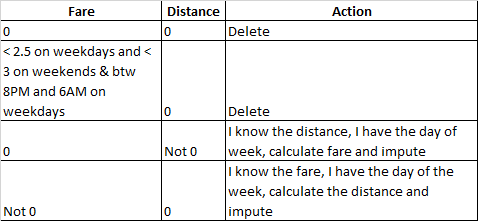


Now we shall check for rows where the distance values are 0

In [137]:
## 2931 rows where distance is 0. 
train[train['H_Distance']==0].shape

(2931, 15)

In [138]:
train.drop(train[train['H_Distance']==0].index,axis=0,inplace=True)

**PART 2 --> MODELLING AND PREDICTION**

FINALLY! Data cleansing is done! Now to split the x and y variables and proceed to modelling. I shall use the random forest method for prediction

In [139]:
train.columns

Index(['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'H_Distance', 'Year', 'Month', 'Date', 'Day of Week',
       'Hour', 'Range_Distance'],
      dtype='object')

In [140]:
#not including the pickup_datetime columns as datetime columns cannot be directly used while modelling. Features need to extracted from the 
#timestamp fields which will later be used as features for modelling.
train = train.drop(['key','pickup_datetime','pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude','H_Distance'], axis = 1)

In [141]:
train.columns

Index(['fare_amount', 'passenger_count', 'Year', 'Month', 'Date',
       'Day of Week', 'Hour', 'Range_Distance'],
      dtype='object')

In [76]:
#Separate the features and target variable
x_train = train.iloc[:,train.columns!='fare_amount']
y_train = train['fare_amount'].values

In [77]:
x_train.shape

(97057, 7)

In [78]:
x_train.columns

Index(['passenger_count', 'Year', 'Month', 'Date', 'Day of Week', 'Hour',
       'Range_Distance'],
      dtype='object')

In [79]:
y_train.shape

(97057,)

In [ ]:
#Divide the data into actual train and test
#please note that actual train data frame above has all the data, now we are dividing into train and test


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train, y_train)
rf_predict = rf.predict(x_test)
#print(rf_predict)

In [ ]:
submission = pd.read_csv('../input/sample_submission.csv')
submission['fare_amount'] = rf_predict
submission.to_csv('submission_1.csv', index=False)
submission.head(20)

**BOOSTING USING LGBM**

This is my first attempt at using a boosting algorithm such as LGBM. Let's see if LGBM really lives up to its hype of improving scores. My intital score with just the RF was 3.39 and placed me in the top 20%.

In [ ]:
import lightgbm as lgbm

In [ ]:
params = {
        'boosting_type':'gbdt',
        'objective': 'regression',
        'nthread': -1,
        'verbose': 0,
        'num_leaves': 31,
        'learning_rate': 0.05,
        'max_depth': -1,
        'subsample': 0.8,
        'subsample_freq': 1,
        'colsample_bytree': 0.6,
        'reg_aplha': 1,
        'reg_lambda': 0.001,
        'metric': 'rmse',
        'min_split_gain': 0.5,
        'min_child_weight': 1,
        'min_child_samples': 10,
        'scale_pos_weight':1     
    }

In [ ]:
pred_test_y = np.zeros(x_test.shape[0])
pred_test_y.shape

In [ ]:
train_set = lgbm.Dataset(x_train, y_train, silent=True)
train_set

In [ ]:
model = lgbm.train(params, train_set = train_set, num_boost_round=300)

In [ ]:
print(model)

In [ ]:
pred_test_y = model.predict(x_test, num_iteration = model.best_iteration)

In [ ]:
print(pred_test_y)

In [ ]:
submission['fare_amount'] = pred_test_y
submission.to_csv('submission_LGB.csv', index=False)
submission.head(20)

**BOOSTING USING XGBM**

In [2]:
import xgboost as xgboost

In [3]:
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test)

NameError: name 'xgb' is not defined

In [ ]:
dtrain

In [ ]:
#set parameters for xgboost
params = {'max_depth':7,
          'eta':1,
          'silent':1,
          'objective':'reg:linear',
          'eval_metric':'rmse',
          'learning_rate':0.05
         }
num_rounds = 50

In [ ]:
xb = xgb.train(params, dtrain, num_rounds)

In [ ]:
y_pred_xgb = xb.predict(dtest)
print(y_pred_xgb)

In [ ]:
list1=

In [ ]:
submission['fare_amount'] = y_pred_xgb
submission.to_csv('submission_XGB.csv', index=False)
submission.head(20)

And that's a wrap! With the Random Forest code I, got a score of 3.39, which was in the top 20%, with LGBM I got a score of 3.37 (which wasn't a great improvement from my initial RF model but helped me jump a couple of places up the leaderboard), and with XGBoost I got a 3.61, which is the worst of all my submissions. Maybe parameter tuning would help further. :) 